# Assignment 6 Solution

This assignment is collaborated by **Jingting Dai** and **Hongjie Guan**. **Jingting finished A06.1 and Hongjie finished A06.2 and A06.3** 

## A06.1 Exponential Random Graph Models

Task: For the World Trade Web dataset, fit different ERGM-based Configuration Models and compare basic network metrics with null models

For each of the WTW networks provided:
+ measure the average clustering and reciprocity coefficients
+ fit the Undirected Binary CM and Directed Binary CM
+ sample 30 networks from the obtained distributions and measure clustering and reciprocity. Calculate average and standard error on each measure
+ plot clustering and reciprocity as functions of time, comparing the real value with the average and error bars from samples

In [1]:
import networkx as nx
import numpy as np
import os
from NEMtropy import UndirectedGraph, DirectedGraph
from NEMtropy.network_functions import build_adjacency_from_edgelist
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [2]:
def import_datasets(datasets_folder):
    d={} #empty dictionary
    for item in os.listdir(datasets_folder):
        if 'graphml' in item:
            item_path = os.path.join(datasets_folder,item)
            item_name = item.split(".")[0].split("_",1)[1]
            print("dataset named "+item_name+" imported")
            d["{}".format(item_name)] = nx.read_graphml(item_path)
    print("finish importing")
    return d

In [3]:
graphs = import_datasets('data/World_Trade_Web')

dataset named 1997 imported
dataset named 1992 imported
dataset named 2000 imported
dataset named 1998 imported
dataset named 1994 imported
dataset named 1993 imported
dataset named 2002 imported
dataset named 1996 imported
dataset named 1995 imported
dataset named 1999 imported
dataset named 2001 imported
finish importing


Unweighted average clustering and reciprocity coefficient:

In [4]:
avg_clustring = {}
for name, graph in graphs.items():
    clustering = nx.average_clustering(graph)
    avg_clustring[name] = clustering
avg_clustring

{'1997': 0.7844618494148852,
 '1992': 0.8021364732946835,
 '2000': 0.7928732278480053,
 '1998': 0.7913458153848136,
 '1994': 0.778118724128831,
 '1993': 0.7826552252417198,
 '2002': 0.7955013137787762,
 '1996': 0.779859983253989,
 '1995': 0.769316598518603,
 '1999': 0.7946922756897296,
 '2001': 0.8020845961993215}

In [5]:
reciprocity = {}
for name, graph in graphs.items():
    recip = nx.reciprocity(graph)
    reciprocity[name] = recip
reciprocity

{'1997': 0.6822429906542056,
 '1992': 0.367340010185028,
 '2000': 0.7232351897836112,
 '1998': 0.7015887290167866,
 '1994': 0.541138903672166,
 '1993': 0.430931744312026,
 '2002': 0.7041909280425562,
 '1996': 0.6482433229421182,
 '1995': 0.6043664931031333,
 '1999': 0.716582186821144,
 '2001': 0.7375525101577026}

+ UBCM

In [6]:
#numpy adjacency matrix
un_adj_wtw = {}
for name, graph in graphs.items():
    adj = nx.to_numpy_array(graph.to_undirected())
    un_adj_wtw[name] = adj

In [7]:
#NEMtropy UndirectedGraph object
undirected = {}
for name, adj in un_adj_wtw.items():
    graph = UndirectedGraph(adj)
    undirected[name] = graph

In [8]:
cluster = {}
for name, graph in undirected.items():
    graph.solve_tool(model="cm_exp", max_steps=10000)
    graph.ensemble_sampler(30, cpu_n=1, output_dir=f"undirected_sample_{name}/")
    clust = []
    for i in range(30):
        edgelist_ens = np.loadtxt(f"undirected_sample_{name}/{i}.txt")
        net = nx.Graph()
        net.add_edges_from(edgelist_ens)
        clust.append(nx.average_clustering(net))
    cluster[name] = clust


solution error = 2.018055056396406e-09

solution error = 5.940705705143046e-09

solution error = 2.489372263880796e-09

solution error = 1.516241354693193e-09

solution error = 3.709800466822344e-09

solution error = 4.086331273356336e-09

solution error = 3.6331755381979747e-09

solution error = 3.1374156606034376e-09

solution error = 2.34123831432953e-09

solution error = 1.290629825234646e-09

solution error = 3.776193580051768e-09


In [9]:
ubcm_avg_cluster = {}
ubcm_std = {}
for name, clust in cluster.items():
    avg_cluster = np.average(clust)
    std = np.std(clust)
    ubcm_avg_cluster[name] = avg_cluster
    ubcm_std[name] = std

In [10]:
def plot_avg_clustering(cluster_dict, std_dict, method):
    N = sorted(cluster_dict.keys())
    c = [cluster_dict[i] for i in N]
    errorbar = [std_dict[i]*2 for i in N]
    plt.errorbar(N, c, yerr = errorbar,label="average clustering with 95% confidence interval")
    plt.errorbar(sorted(avg_clustring.keys()),[avg_clustring[i] for i in sorted(avg_clustring.keys())],label = "real average clustering")
    plt.xlabel('time')
    plt.ylabel('average clustering')
    plt.legend(loc='best')
    plt.title("{} average clustering".format(method))
    plt.show()

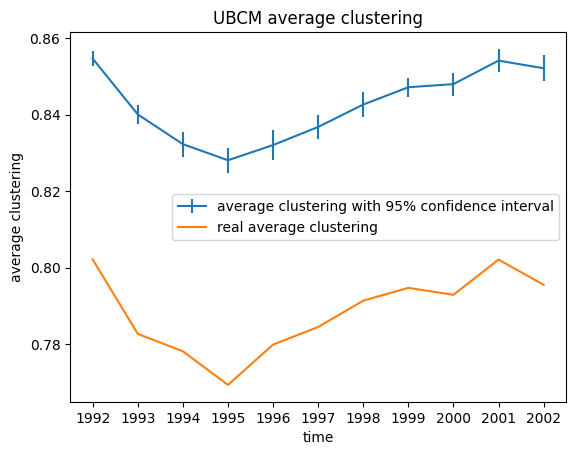

In [11]:
plot_avg_clustering(ubcm_avg_cluster, ubcm_std, "UBCM")

+ Directed

In [12]:
#numpy adjacency matrix
di_adj_wtw = {}
for name, graph in graphs.items():
    di_adj = nx.to_numpy_array(graph)
    di_adj_wtw[name] = di_adj

In [13]:
#NEMtropy DirectedGraph object
directed = {}
for name, adj in di_adj_wtw.items():
    graph = DirectedGraph(adj)
    directed[name] = graph

In [14]:
di_cluster = {}
di_reciprocity = {}
for name, graph in directed.items():
    graph.solve_tool(model="dcm_exp", max_steps=10000)
    graph.ensemble_sampler(30, cpu_n=1, output_dir=f"directed_sample_{name}/")
    di_clust = []
    di_reci = []
    for i in range(30):
        edgelist_ens = np.loadtxt(f"directed_sample_{name}/{i}.txt")
        ens_adj = build_adjacency_from_edgelist(edgelist = edgelist_ens,
                                                is_directed = True,
                                                is_sparse = False,
                                                is_weighted = False)
        G = nx.from_numpy_array(ens_adj,create_using=nx.DiGraph)
        di_clust.append(nx.average_clustering(G))
        di_reci.append(nx.reciprocity(G))
    di_cluster[name] = di_clust
    di_reciprocity[name] = di_reci


solution error = 3.602323772611271e-09

solution error = 1.2366427881715936e-09

solution error = 3.74742725739452e-09

solution error = 1.7509620420241845e-09

solution error = 2.597019488348451e-09

solution error = 4.877033887851212e-09

solution error = 2.2263009213929763e-09

solution error = 1.2960299500264227e-09

solution error = 2.597786874503072e-09

solution error = 1.3704379853152204e-09

solution error = 3.1839633152230817e-09


In [15]:
dbcm_avg_cluster = {}
dbcm_std = {}
dbcm_avg_reciprocity = {}
dbcm_reci_std = {}
for name, clust in di_cluster.items():
    avg_cluster = np.average(clust)
    std = np.std(clust)
    dbcm_avg_cluster[name] = avg_cluster
    dbcm_std[name] = std
for name, reci in di_reciprocity.items():
    avg_reci = np.average(reci)
    std = np.std(reci)
    dbcm_avg_reciprocity[name] = avg_reci
    dbcm_reci_std[name] = std

In [16]:
def plot_avg_reciprocity(reci_dict, reci_std_dict, method):
    N = sorted(reci_dict.keys())
    c = [reci_dict[i] for i in N]
    errorbar = [reci_std_dict[i]*2 for i in N]
    plt.errorbar(N, c, yerr = errorbar,label="average reciprocity with 95% confidence interval")
    plt.errorbar(sorted(reciprocity.keys()),[reciprocity[i] for i in sorted(reciprocity.keys())],label = "real reciprocity")
    plt.xlabel('time')
    plt.ylabel('reciprocity coefficient')
    plt.legend(loc='best')
    plt.title("{} reciprocity coefficient".format(method))
    plt.show()

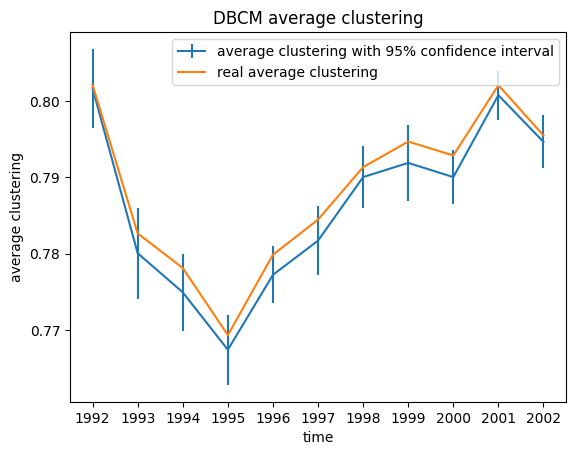

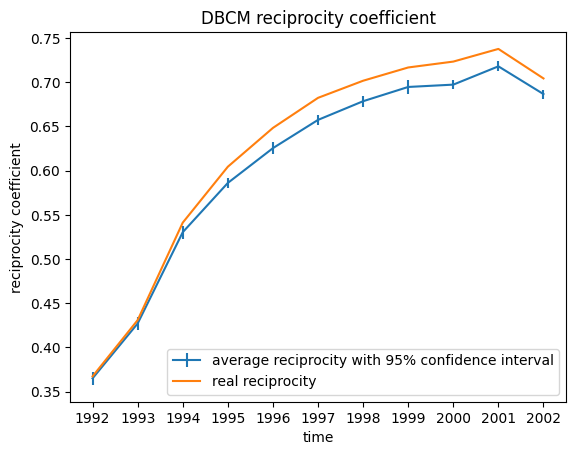

In [17]:
plot_avg_clustering(dbcm_avg_cluster, dbcm_std, "DBCM")
plot_avg_reciprocity(dbcm_avg_reciprocity, dbcm_reci_std, "DBCM")

## A06.2 - Weighted ERGMs

Task: Repeat the analysis of point 1 with weighted networks

+ measure strength assortativity coefficient on the data
+ fit the Undirected Enhanced CM and Directed Enhanced CM using the CReMa method
+ sample 30 networks from the obtained distributions and measure strength assortativity. Calculate average and std dev
+ plot strength assortativity as a function of time, comparing the real value with the average and error bars from samples
+ DECM: plot all pairs of assortativity (in-in, in-out, out-out)

### measure strength assortativity coefficient on the data

In [18]:
graphs

{'1997': <networkx.classes.digraph.DiGraph at 0x1347958d0>,
 '1992': <networkx.classes.digraph.DiGraph at 0x103bfcdf0>,
 '2000': <networkx.classes.digraph.DiGraph at 0x1342cff40>,
 '1998': <networkx.classes.digraph.DiGraph at 0x132bf5ff0>,
 '1994': <networkx.classes.digraph.DiGraph at 0x103bfe170>,
 '1993': <networkx.classes.digraph.DiGraph at 0x103bfe770>,
 '2002': <networkx.classes.digraph.DiGraph at 0x1342cf130>,
 '1996': <networkx.classes.digraph.DiGraph at 0x1342cf340>,
 '1995': <networkx.classes.digraph.DiGraph at 0x1324d9b10>,
 '1999': <networkx.classes.digraph.DiGraph at 0x137bb3f40>,
 '2001': <networkx.classes.digraph.DiGraph at 0x103bfe7a0>}

In [19]:
strength_assortativity_coefficient = {}
for name, graph in graphs.items():
    assortativity = nx.degree_pearson_correlation_coefficient(graph,weight='weight')
    strength_assortativity_coefficient[name] = assortativity
strength_assortativity_coefficient

{'1997': -0.07171683897072258,
 '1992': -0.05986979308699181,
 '2000': -0.06539073425903137,
 '1998': -0.06572057397949715,
 '1994': -0.08022501617948122,
 '1993': -0.07202068872957726,
 '2002': -0.06303814946654449,
 '1996': -0.07535502512416246,
 '1995': -0.07830645801950409,
 '1999': -0.06546711179930134,
 '2001': -0.0619262596185277}

+ UECM

In [21]:
strenth_assortativity_generated_UECM = {}

for year,G in graphs.items():
    adj_weigh = nx.to_numpy_array(G.to_undirected())
    adj_bin = adj_weigh.astype(bool).astype(float)
    strength_seq = adj_weigh.sum(axis=1)
    
    del adj_weigh
    
    graph_weighted = UndirectedGraph(strength_sequence=strength_seq)
    graph_weighted.solve_tool(model="crema",
                              method="newton",
                              initial_guess="random",
                              adjacency=adj_bin,
                              method_adjacency="newton",
                              max_steps = 10000)
    graph_weighted.ensemble_sampler(30, cpu_n=1, output_dir=f'undirected_weight_{year}/')
    sac_list = []
    for i in range(30):
        edgelist_ens = np.loadtxt(f"undirected_weight_{year}/{i}.txt")
        ens_adj = build_adjacency_from_edgelist(edgelist = edgelist_ens,
                                                is_directed = False,
                                                is_sparse = False,
                                                is_weighted = True)
        
        g = nx.from_numpy_array(ens_adj)
        sac = nx.degree_pearson_correlation_coefficient(g,weight='weight')
        sac_list.append(sac)
    strenth_assortativity_generated_UECM[year]=sac_list
    


solution error = 50.00995758920908

solution error = 0.00030517578125

solution error = 5940.158035099506

solution error = 1152.670037895441

solution error = 2153.702324181795

solution error = 453.7103610634804

solution error = 36767.919327676296

solution error = 9.737082999199629

solution error = 1267.8110170774162

solution error = 238.87586510926485

solution error = 76.09851762279868


In [23]:
UECM_avg_sac={}
UECM_std_sac={}
for year,sac in strenth_assortativity_generated_UECM.items():
    avg_sac = np.mean(sac)
    std_sac = np.std(sac)
    UECM_avg_sac[year]=avg_sac
    UECM_std_sac[year]=std_sac

In [24]:
UECM_avg_sac

{'1997': -0.07014434059986926,
 '1992': -0.09516760074587768,
 '2000': -0.0646643143615407,
 '1998': -0.06261739056269221,
 '1994': -0.10402055296832306,
 '1993': -0.10456557140296704,
 '2002': -0.06220448064138866,
 '1996': -0.07784159296157403,
 '1995': -0.08118292348247827,
 '1999': -0.06352771529556238,
 '2001': -0.05568768586335826}

In [25]:
UECM_std_sac

{'1997': 0.01478211193913079,
 '1992': 0.019376596607544566,
 '2000': 0.012179163005304515,
 '1998': 0.011707118202286195,
 '1994': 0.019610192510861886,
 '1993': 0.02082886968916809,
 '2002': 0.011139954542793004,
 '1996': 0.014506964815501294,
 '1995': 0.018840756154380734,
 '1999': 0.014296002260938367,
 '2001': 0.010040087594847227}

+ DECM

In [58]:
strength_assortativity_coefficient_ii = {}
strength_assortativity_coefficient_io = {}
strength_assortativity_coefficient_oo = {}
for name, graph in graphs.items():
    ii = nx.degree_pearson_correlation_coefficient(graph,x='in',y='in',weight='weight')
    io = nx.degree_pearson_correlation_coefficient(graph,x='in',y='out',weight='weight')
    oo = nx.degree_pearson_correlation_coefficient(graph,x='out',y='out',weight='weight')
    strength_assortativity_coefficient_ii[name] = ii
    strength_assortativity_coefficient_io[name] = io
    strength_assortativity_coefficient_oo[name] = oo

In [63]:
DECM_avg_sac_ii={}
DECM_avg_sac_io={}
DECM_avg_sac_oo={}

DECM_std_sac_ii={}
DECM_std_sac_io={}
DECM_std_sac_oo={}

for year,G in graphs.items():
    adj_weigh = nx.to_numpy_array(G)
    adj_bin = adj_weigh.astype(bool).astype(float)
    out_strength = adj_weigh.sum(axis=1)
    in_strength = adj_weigh.sum(axis=0)
    
    del adj_weigh
    
    graph_weighted = DirectedGraph(strength_sequence=np.concatenate([out_strength, in_strength]))
    graph_weighted.solve_tool(model="crema",
                              method="newton",
                              initial_guess="random",
                              adjacency=adj_bin,
                              method_adjacency="newton",
                              max_steps = 10000)
    graph_weighted.ensemble_sampler(30, cpu_n=1, output_dir=f'directed_weight_{year}/')
    sac_list_ii = []
    sac_list_io = []
    sac_list_oo = []
    for i in range(30):
        edgelist_ens = np.loadtxt(f"directed_weight_{year}/{i}.txt")
        ens_adj = build_adjacency_from_edgelist(edgelist = edgelist_ens,
                                                is_directed = True,
                                                is_sparse = False,
                                                is_weighted = True)
        g = nx.from_numpy_array(ens_adj,create_using=nx.DiGraph)
        sac_list_ii.append(nx.degree_pearson_correlation_coefficient(g,x='in',y='in',weight='weight'))
        sac_list_io.append(nx.degree_pearson_correlation_coefficient(g,x='in',y='out',weight='weight'))
        sac_list_oo.append(nx.degree_pearson_correlation_coefficient(g,x='out',y='out',weight='weight'))
    

    DECM_avg_sac_ii[year]= np.mean(sac_list_ii)
    DECM_avg_sac_io[year]= np.mean(sac_list_io)
    DECM_avg_sac_oo[year]= np.mean(sac_list_oo)

    DECM_std_sac_ii[year]= np.std(sac_list_ii)
    DECM_std_sac_io[year]= np.std(sac_list_io)
    DECM_std_sac_oo[year]= np.std(sac_list_oo)




solution error = 324410.8610229492

solution error = 318097.8577270508

solution error = 280783.76916503906

solution error = 152338.57305908203

solution error = 318805.0933227539

solution error = 316897.2409667969

solution error = 249291.4351196289

solution error = 290858.7537841797

solution error = 76627.9458618164

solution error = 247097.15014648438

solution error = 89330.46087646484


In [64]:
DECM_avg_sac_ii

{'1997': -0.06845962858341682,
 '1992': -0.05038750519627497,
 '2000': -0.05793087981391456,
 '1998': -0.060856757072359116,
 '1994': -0.07186483387424478,
 '1993': -0.06353409169812946,
 '2002': -0.05789110801616981,
 '1996': -0.07478432695560654,
 '1995': -0.07539381266501227,
 '1999': -0.061338600248286815,
 '2001': -0.055302861311969584}

In [65]:
DECM_avg_sac_io

{'1997': -0.06457408038650866,
 '1992': -0.04562317479399367,
 '2000': -0.05923025818900345,
 '1998': -0.059794149097220424,
 '1994': -0.06850200526765024,
 '1993': -0.05951695006020177,
 '2002': -0.05697982513198307,
 '1996': -0.07156175352086082,
 '1995': -0.07233064200129555,
 '1999': -0.061243241976580744,
 '2001': -0.05489485527937028}

In [66]:
DECM_avg_sac_oo

{'1997': -0.06399668728370864,
 '1992': -0.05462053379972628,
 '2000': -0.06353389665739496,
 '1998': -0.06151462487725058,
 '1994': -0.07076260452513988,
 '1993': -0.06742827349493605,
 '2002': -0.060879205388993454,
 '1996': -0.07078394166238562,
 '1995': -0.07295873385199568,
 '1999': -0.06417271964999925,
 '2001': -0.05721894802611769}

In [67]:
DECM_std_sac_ii

{'1997': 0.012499743268656178,
 '1992': 0.008261583891388135,
 '2000': 0.010560967859036974,
 '1998': 0.012388602817830356,
 '1994': 0.010245252901732161,
 '1993': 0.013341980759069763,
 '2002': 0.009636965364704002,
 '1996': 0.011077543591356667,
 '1995': 0.01274791138203763,
 '1999': 0.010427288421470752,
 '2001': 0.008731251124244142}

In [68]:
 DECM_std_sac_io

{'1997': 0.011545643971588408,
 '1992': 0.009048470344746573,
 '2000': 0.008970746355004678,
 '1998': 0.011479069578255275,
 '1994': 0.010027371912442547,
 '1993': 0.014116302182569486,
 '2002': 0.008261155301526693,
 '1996': 0.011737813989358662,
 '1995': 0.01162457707849181,
 '1999': 0.008912053976529045,
 '2001': 0.008284251482809153}

In [69]:
 DECM_std_sac_oo

{'1997': 0.010731116395434153,
 '1992': 0.009415467979805015,
 '2000': 0.008781078489888397,
 '1998': 0.010894165758511584,
 '1994': 0.011404298302468672,
 '1993': 0.015530446401200016,
 '2002': 0.00796860027720629,
 '1996': 0.013141599326740708,
 '1995': 0.011183615825107523,
 '1999': 0.008787871724651768,
 '2001': 0.008794604955050491}

In [70]:
def plot_UECM_strength_assortativity(real_values,avg_dict, std_dict):
    year = sorted(real_values.keys())
    avg = [avg_dict[i] for i in year]
    errorbar = [std_dict[i]*2 for i in year]
    plt.errorbar(year, avg, yerr = errorbar,color='red',label="average strength assortativity with 95% confidence interval")
    plt.errorbar(year,[real_values[i] for i in year],color='blue',label = "real strength assortativity")
    plt.xlabel('time')
    plt.ylabel('strength assortativity coefficient')
    plt.legend(loc='best')
    plt.title("UECM strength assortativity coefficient")
    plt.show()

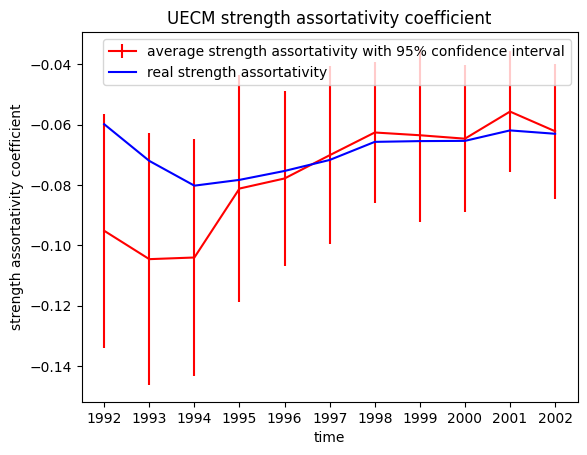

In [71]:
plot_UECM_strength_assortativity(strength_assortativity_coefficient, UECM_avg_sac, UECM_std_sac)

In [78]:
def plot_DECM_strength_assortativity(real_values,avg_dict, std_dict, method):
    year = sorted(real_values.keys())
    avg = [avg_dict[i] for i in year]
    errorbar = [std_dict[i]*2 for i in year]
    plt.errorbar(year, avg, yerr = errorbar,color='red',label="with 95% confidence interval".format(method))
    
    plt.errorbar(year,[real_values[i] for i in year],color='blue',label = "real strength assortativity")
    plt.xlabel('time')
    plt.ylabel('strength assortativity coefficient')
    plt.legend(loc='best')
    plt.title("DECM {} strength assortativity coefficient".format(method))
    plt.show()

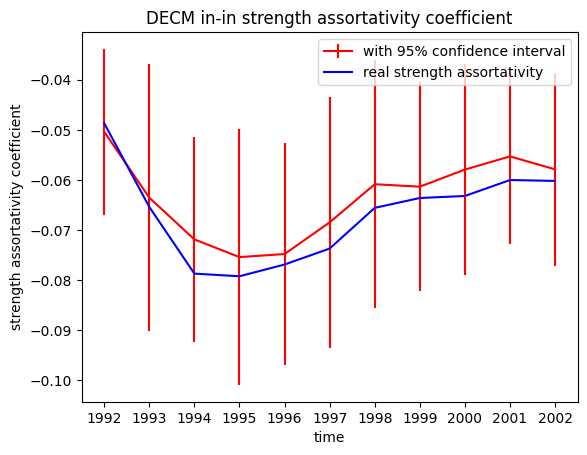

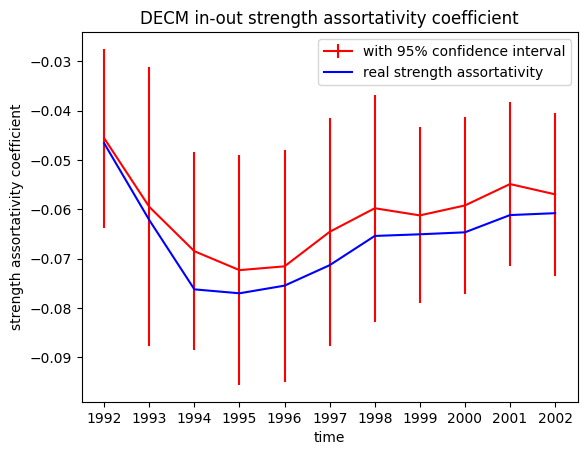

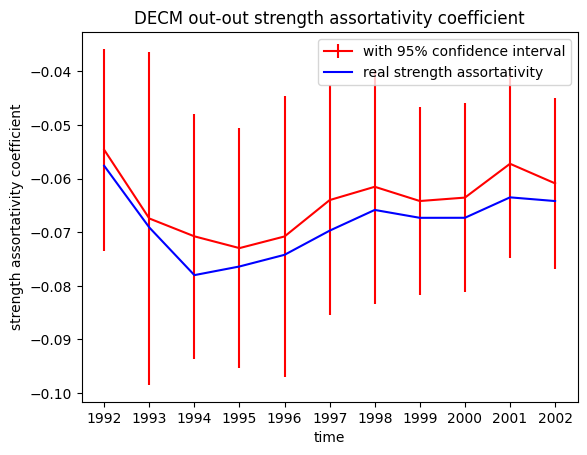

In [79]:
plot_DECM_strength_assortativity(strength_assortativity_coefficient_ii,DECM_avg_sac_ii,DECM_std_sac_ii,"in-in")
plot_DECM_strength_assortativity(strength_assortativity_coefficient_io,DECM_avg_sac_io,DECM_std_sac_io,"in-out")
plot_DECM_strength_assortativity(strength_assortativity_coefficient_oo,DECM_avg_sac_oo,DECM_std_sac_oo,"out-out")

## A06.3 - Drawing conclusions

Task: write a short paragraph to draw conclusions about the structure of the World Trade Web based on the ERGM inferential approach

You should include at least the following points:
+ Comment on the interpretation of the clustering and reciprocity coefficients found in the original data
+ Comment on the interpretation of strength assortativity for this dataset
+ Comment on the conclusions you can draw via the inference of the UBCM, DBCM and DECM models

+ The original clustering is around 0.77 to 0.8 and decreases before 1995 and increases afterward. The reciprocity coefficient has witnessed continuous growth from 0.35 to 0.75. The turning point of the clustering coefficient coincides with the establishment of the World Trade Organization(WTO). It is reasonable to believe that impact given by WTO can be seen from the data. Before WTO establishes, the reciprocity coefficient increased while original clustering decreased. This can be explained by the Unilateralism of those years: those major trade countries such as the USA(nodes with higher degrees) increase their mutual trades with their own trade partners (those nodes with low degrees). However, those trader partners (small degree nodes) didn't develop the trading among themselves. This is the reason why clustering is decreasing while the reciprocity coefficient is increasing. After 1995, trading increases among smaller countries, and their trading is mutual, so both the clustering and reciprocity coefficients are increasing.


+ The strength assortativity was around -0.06 to -0.08 during that 10 years. The assortativity indicates the tendency of a node is connected with a node with a similar degree. In the context of a directed graph in world trade, "in-in", "in-out", and "out-out" indicate respectively the tendency of a node to be connected with a node with the same "import", with "export close to its import", with same "export". It shows that the network is generally non-assortative and slightly disassortative. The"out-out" assortativity is lower than the "in-in" and "in-out", which may indicate that countries are more unlikely to trade with countries with the same "export".

+ **UBCM** doesn't capture clustering well because we will overestimate it when we cast the directed network to an undirected one. When we cast a directed network to an undirected one, for each neighborhood $N_{i}$, the links that could exist among the vertices within the neighborhood would change from $k_{i}(k_{i}-1)$ to $k_{i}(k_{i}-1)/2 $, where $k_{i}$ is the number of neighbors of a vertex). Any single-direction edge would be treated as a double-direction edge. **DBCM** captures the clustering well since it didn't cast the network to an undirected one, but it didn't capture the reciprocity well. It is understandable because we give up the weights, instead, we use {0,1} to describe the edges, which will have a loss of information here. So the real data didn't lay within the error bar of the 95% confidence level.**DECM** captures the real dataset the best with the assortativity fully laying in the error bar of the 95% confidence level.